In [1]:
from IPython.display import Image
%matplotlib inline
import kcfconvoy as kcf

In [2]:
cpd = kcf.Compound.Compound()

In [3]:
cpd.input_from_kegg('C00002')

True

In [4]:
kcf.converter.rdkmol_to_keggatoms(cpd.mol)

{0: 'N4y',
 1: 'C8y',
 2: 'C1y',
 3: 'C8x',
 4: 'C8y',
 5: 'N5x',
 6: 'O2x',
 7: 'C1y',
 8: 'N5x',
 9: 'C8y',
 10: 'C8x',
 11: 'C1y',
 12: 'C1y',
 13: 'O1a',
 14: 'N5x',
 15: 'N1a',
 16: 'C1b',
 17: 'O1a',
 18: 'O2b',
 19: 'P1b',
 20: 'O2c',
 21: 'O1c',
 22: 'O1c',
 23: 'P1b',
 24: 'O2c',
 25: 'O1c',
 26: 'O1c',
 27: 'P1b',
 28: 'O1c',
 29: 'O1c',
 30: 'O1c'}

In [5]:
print(kcf.converter.rdkmol_to_kcf(cpd.mol, 'ATP'))

ENTRY       ATP                           Compound
ATOM        31   
            1   N4y N    29.4250  -14.6015
            2   C8y C    30.4825  -15.3378
            3   C1y C    28.1393  -15.0165
            4   C8x C    29.9040  -13.2050
            5   C8y C    31.7155  -14.4321
            6   N5x N    30.6227  -16.7578
            7   O2x O    26.9999  -14.1633
            8   C1y C    27.7071  -16.2669
            9   N5x N    31.3532  -13.2108
            10  C8y C    32.9718  -14.9814
            11  C8x C    31.9434  -17.3478
            12  C1y C    25.8897  -14.9580
            13  C1y C    26.3221  -16.2669
            14  O1a O    28.5133  -17.4063
            15  N5x N    33.1353  -16.4655
            16  N1a N    34.0819  -14.1575
            17  C1b C    24.5691  -14.5315
            18  O1a O    25.8780  -17.5874
            19  O2b O    23.5349  -15.4664
            20  P1b P    22.1325  -15.4664
            21  O2c O    20.7361  -15.4664
            22  O1c O    22.

mol.png


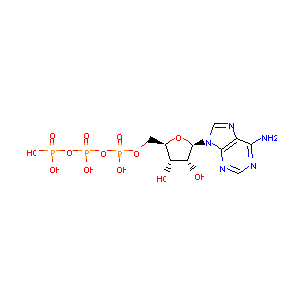

In [6]:
imagefile="mol.png"
cpd.draw_cpd(imagefile)
Image(filename=imagefile)

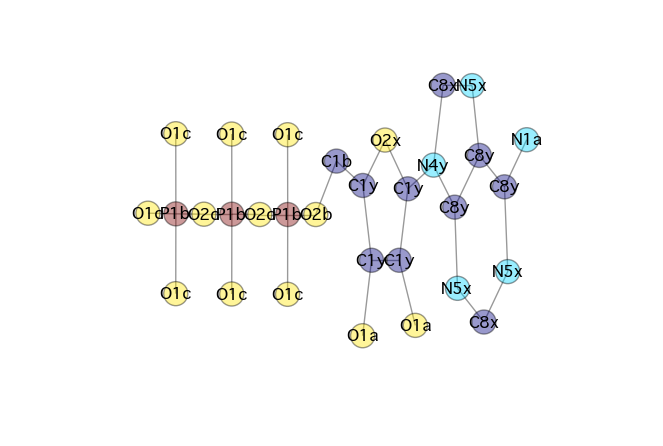

In [7]:
cpd.draw_cpd_with_custom_labels(kcf.converter.rdkmol_to_keggatoms(cpd.mol))

In [8]:
v1 = kcf.converter.kcf_vec(cpd)

In [9]:
cpd2 = kcf.Compound.Compound()
cpd2.input_from_kegg('C00003')
v2 = kcf.converter.kcf_vec(cpd2)

mol.png


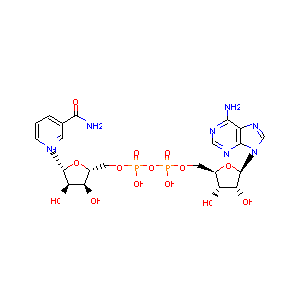

In [10]:
imagefile="mol.png"
cpd2.draw_cpd(imagefile)
Image(filename=imagefile)

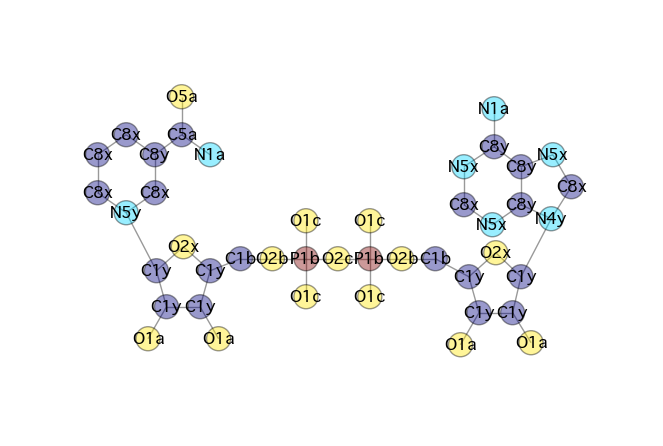

In [11]:
cpd2.draw_cpd_with_custom_labels(kcf.converter.rdkmol_to_keggatoms(cpd2.mol))

In [12]:
v1.pandas()

,str,type,level,count
0,O-P-O,triplet,atom_species,36
1,O1-P1-O2,triplet,atom_class,19
2,O-P,bond,atom_species,18
3,O-P-O-P-O,linear,atom_species,18
4,C-N,bond,atom_species,16
5,O1c-P1b-O2c,triplet,kegg_atom,15
6,O,atom,atom_species,13
7,C-C,bond,atom_species,12
8,C-C-N,triplet,atom_species,12
9,C-N-C,triplet,atom_species,12


In [13]:
v2.pandas()

,str,type,level,count
0,C-C,bond,atom_species,30
1,C-C-O,triplet,atom_species,27
2,C-C-C,triplet,atom_species,24
3,O-P-O,triplet,atom_species,24
4,C-N,bond,atom_species,23
5,C,atom,atom_species,21
6,C-O,bond,atom_species,18
7,C-N-C,triplet,atom_species,18
8,C-C-N,triplet,atom_species,17
9,C1-C1,bond,atom_class,16


In [14]:
kcf.converter.similarity(v1, v2)

(0.32748694604364709, 0.64538258575197893, 0.3993469387755102)

In [15]:
cpd3 = kcf.Compound.Compound()

In [16]:
cpd3.input_from_knapsack('C00002657')

True

mol.png


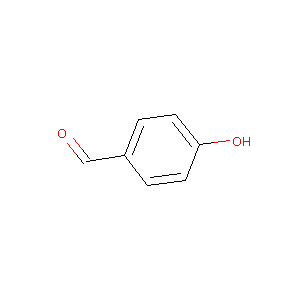

In [17]:
imagefile="mol.png"
cpd3.draw_cpd(imagefile)
Image(filename=imagefile)

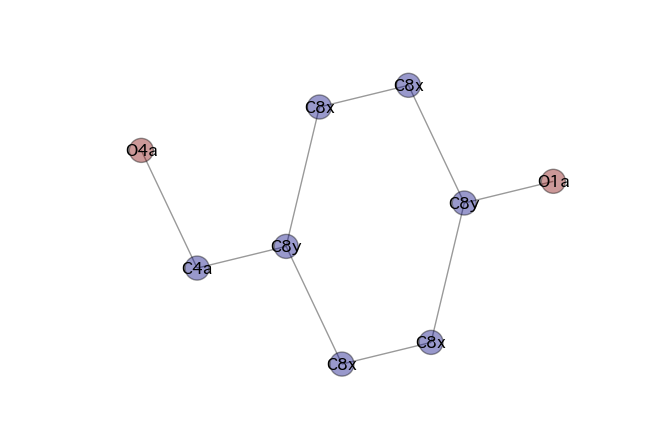

In [18]:
cpd3.draw_cpd_with_custom_labels(kcf.converter.rdkmol_to_keggatoms(cpd3.mol))

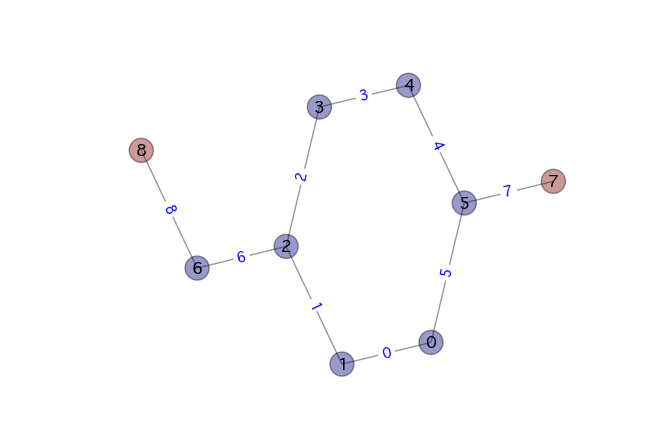

In [19]:
cpd3.draw_cpd_with_labels(start=0)

In [20]:
v3 = kcf.converter.kcf_vec(cpd3)

In [21]:
v3.pandas()

,str,type,level,count
0,C-C-C,triplet,atom_species,16
1,C-C,bond,atom_species,14
2,C8-C8,bond,atom_class,12
3,C8-C8-C8,triplet,atom_class,12
4,C-C-C-C-C,linear,atom_species,8
5,C-C-C-C,linear,atom_species,8
6,C8x-C8x-C8y,triplet,kegg_atom,8
7,C,atom,atom_species,7
8,C8x-C8y,bond,kegg_atom,7
9,C8,atom,atom_class,6


In [22]:
v3.subs_string

[{'0,1': 'C-C',
  '0,1,2': 'C-C-C',
  '0,1,2,3': 'C-C-C-C',
  '0,1,2,3,4': 'C-C-C-C-C',
  '0,1,2,3,4,5': 'C-C-C-C-C-C',
  '0,1,2,3,4,5,6': 'C-C-C-C-C,2-C-C-5',
  '0,1,2,3,4,5,6,7': 'C-C-C-C-C-C,2-C-6,5-O',
  '0,1,2,3,4,5,6,7,8': 'C-C-C-C-C-C,5-O,2-C-O,1-6',
  '0,1,2,3,4,5,6,8': 'C-C-C-C-C-C,3-C-O,1-6',
  '0,1,2,3,4,5,7': 'C-C-C-C-C-C,3-O,1-6',
  '0,1,2,3,4,6': 'C-C-C-C,2-C-C',
  '0,1,2,3,4,6,8': 'C-C-C-C-C,3-C-O',
  '0,1,2,3,5': 'C-C-C-C-C',
  '0,1,2,3,5,6': 'C-C-C-C-C,4-C',
  '0,1,2,3,5,6,8': 'C-C-C-C-C,2-C-O',
  '0,1,2,3,5,7': 'O-C-C-C-C-C',
  '0,1,2,3,6': 'C-C-C-C,3-C',
  '0,1,2,3,6,8': 'C-C-C-C,2-C-O',
  '0,1,2,4,5': 'C-C-C-C-C',
  '0,1,2,4,5,6': 'C-C-C-C-C-C',
  '0,1,2,4,5,6,8': 'C-C-C-C-C-C-O',
  '0,1,2,4,5,7': 'C-C-C-C-C,2-O',
  '0,1,2,5': 'C-C-C-C',
  '0,1,2,5,6': 'C-C-C-C-C',
  '0,1,2,5,6,7': 'O-C-C-C-C-C',
  '0,1,2,5,6,7,8': 'O-C-C-C-C-C-O',
  '0,1,2,5,6,8': 'C-C-C-C-C-O',
  '0,1,2,5,7': 'O-C-C-C-C',
  '0,1,2,6': 'C-C-C-C',
  '0,1,2,6,8': 'C-C-C-C-O',
  '0,1,3,4,5': 'C-C-C-C-

In [23]:
v3.string2seq()

[{'C-C': ['4,5', '0,5', '3,4', '1,2', '0,1', '2,3', '2,6'],
  'C-C-C': ['1,2,3',
   '0,4,5',
   '0,1,5',
   '2,3,6',
   '1,2,6',
   '2,3,4',
   '0,1,2',
   '3,4,5'],
  'C-C-C-C': ['0,1,2,3',
   '0,1,4,5',
   '1,2,3,4',
   '0,1,2,5',
   '0,3,4,5',
   '2,3,4,5',
   '0,1,2,6',
   '2,3,4,6'],
  'C-C-C-C,2-C-C': ['0,1,2,3,4,6'],
  'C-C-C-C,2-C-O': ['0,1,2,3,6,8', '1,2,3,4,6,8'],
  'C-C-C-C,2-O': ['0,1,4,5,7', '0,3,4,5,7'],
  'C-C-C-C,3-C': ['0,1,2,3,6', '1,2,3,4,6'],
  'C-C-C-C-C': ['0,1,3,4,5',
   '0,2,3,4,5',
   '0,1,2,5,6',
   '0,1,2,3,4',
   '1,2,3,4,5',
   '2,3,4,5,6',
   '0,1,2,4,5',
   '0,1,2,3,5'],
  'C-C-C-C-C,2-C-C-5': ['0,1,2,3,4,5,6'],
  'C-C-C-C-C,2-C-O': ['0,1,2,3,5,6,8', '1,2,3,4,5,6,8'],
  'C-C-C-C-C,2-O': ['0,2,3,4,5,7', '0,1,2,4,5,7'],
  'C-C-C-C-C,3-C-O': ['0,1,2,3,4,6,8'],
  'C-C-C-C-C,3-O': ['0,1,3,4,5,7'],
  'C-C-C-C-C,4-C': ['0,1,2,3,5,6', '1,2,3,4,5,6'],
  'C-C-C-C-C-C': ['0,1,2,3,4,5', '0,1,2,4,5,6', '0,2,3,4,5,6'],
  'C-C-C-C-C-C,2-C-6,5-O': ['0,1,2,3,4,5,6,7'],
  